In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Q6

Import some prerequisites:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Run this cell for plotting.

In [3]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''
    
    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Here is for your helper functions(optional).

In [21]:
def padding(img, padd_size1, padd_size2):
  pad_img = np.zeros((img.shape[0]+2*padd_size1, img.shape[1]+2*padd_size2), dtype=np.uint8)
  pad_img[padd_size1:img.shape[0]+padd_size1, padd_size2:img.shape[1]+padd_size2] = img
  return pad_img

Implement this function to get the input image and return the skeleton of the input image.

In [52]:
def dilate(img, kernel): 
    '''
    Dialates image with given kernel.

    Parameters:
        img (np.ndarray): The image to dialate.
        kernel (np.ndarray): The kernel to dialate image with.

    Returns:
        np.ndarray: The dialated image.
    '''
    img_dialated = np.zeros(img.shape)
    p_size1, p_size2 = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad_image = padding(img, p_size1, p_size2)

    kernel_reflection = np.rot90(np.rot90(kernel))
    
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        img_tmp = pad_image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        img_tmp = img_tmp * kernel
        if (img_tmp > 0).any():
          img_dialated[i, j] = np.max(img_tmp)

    return img_dialated

Test implementation

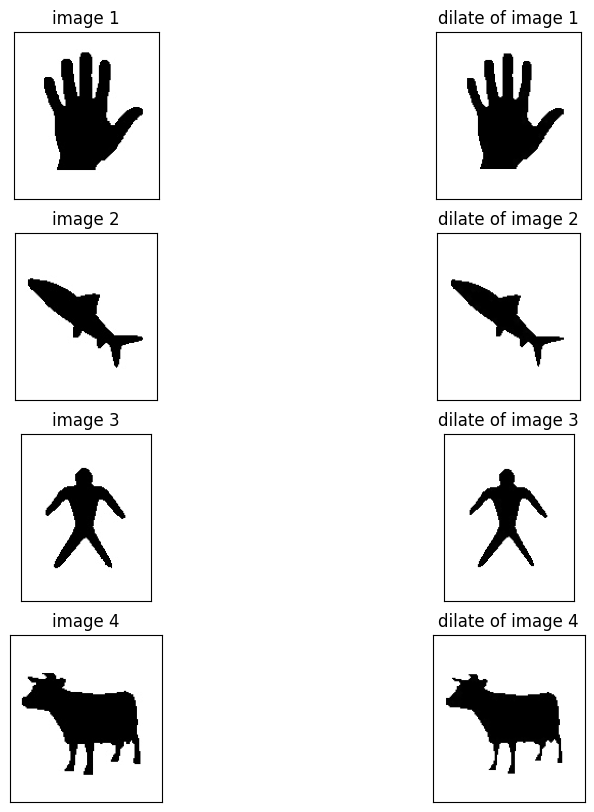

In [53]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_dilate, 'dilate of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_dilate, 'dilate of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-dilate')

In [71]:
def erode(img, kernel): 
    '''
    Erodes image with given kernel.

    Parameters:
        img (np.ndarray): The image to erode.
        kernel (np.ndarray): The kernel to erode image with.

    Returns:
        np.ndarray: The eroded image.
    '''
    img_eroded = np.zeros(img.shape)
    p_size1, p_size2 = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad_image = padding(img, p_size1, p_size2)
    
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
        img_tmp1 = pad_image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
        img_sum = np.sum(img_tmp1)
        img_tmp2 = img_tmp1 * kernel
        erode_sum = np.sum(img_tmp2)
        if erode_sum <= img_sum:
          img_eroded[i, j] = np.min(img_tmp1)
        else:
          img_eroded[i, j] = img[i, j]
    
    
    return img_eroded

Test your implementation

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_erode, 'erode of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_erode, 'erode of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_erode, 'erode of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-erode')

In [83]:
def open_morphology(img, kernel): 
    '''
    Performs opening morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform opening morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''
    img_opened = img.copy()
    erode_img = erode(img_opened, kernel)
    img_opened = dilate(erode_img, kernel)
    
    return img_opened

Test your implementatino

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_open, 'open of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_open, 'open of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_open, 'open of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-open')

In [88]:
def close_morphology(img, kernel): 
    '''
    Performs closing morphology operation on the image.

    Parameters:
        img (numpy.ndarray): The image to perform closing morphology operation on.

    Returns:
        numpy.ndarray: The result image.
    '''

    img_closed = img.copy()
    dilate_img = dilate(img_closed, kernel)
    img_closed = erode(dilate_img, kernel)
    
    return img_closed

Test your implemention

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image1_close, 'close of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image2_close, 'close of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image3_close, 'close of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]]))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-a-close')

# Part 2

In [54]:
def dilate_with_opencv(image, kernel):
  
  dilated_img = cv2.dilate(image, kernel, iterations=1)
  return dilated_img

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_dilate = dilate_with_opencv(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_dilate, 'dilate of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_dilate= dilate_with_opencv(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_dilate, 'dilate of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_dilate = dilate_with_opencv(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_dilate, 'dilate of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_dilate = dilate_with_opencv(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_dilate, 'dilate of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-dilate')

In [76]:
def erode_with_opencv(image, kernel):

  eroded_img = cv2.erode(image, kernel, iterations = 1)
  return eroded_img

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_erode = erode_with_opencv(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_erode, 'erode of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_erode= erode_with_opencv(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_erode, 'erode of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_erode = erode_with_opencv(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_erode, 'erode of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_erode = erode_with_opencv(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_erode, 'erode of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-erode')

In [79]:
def open_morphology_with_opencv(image, kernel):

  opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
  return opening

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_open = open_morphology_with_opencv(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_open, 'open of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_open= open_morphology_with_opencv(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_open, 'open of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_open = open_morphology_with_opencv(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_open, 'open of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_open = open_morphology_with_opencv(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_open, 'open of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-open')

In [81]:
def close_morphology_with_opencv(image, kernel):

  opening = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
  return opening

In [ ]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_close = close_morphology_with_opencv(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_close, 'close of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_close= close_morphology_with_opencv(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_close, 'close of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_close = close_morphology_with_opencv(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_close, 'close of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_close = close_morphology_with_opencv(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_close, 'close of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-b-close')

# Part 3: optional
Skeleton of image

In [117]:
def get_skeleton(image, kernel):
    """
    Finds the skeleton of the input image.
    
    Parameters:
        image (numpy.ndarray): The input image.
    
    Returns:
        numpy.ndarray: The skeleton image.  
    """
    
    binary_image = image.copy()

    _, binary_image = cv2.threshold(binary_image, 127, 255, cv2.THRESH_BINARY_INV) 
    skeleton = np.zeros(shape=image.shape)
    
    while cv2.countNonZero(binary_image) > 0:
      open = open_morphology(binary_image, kernel)
      subtract = binary_image - open
      skeleton += subtract
      binary_image = erode(binary_image, kernel)

    binary_image = skeleton
    
    return binary_image

Test your implementation (don't change this cell).

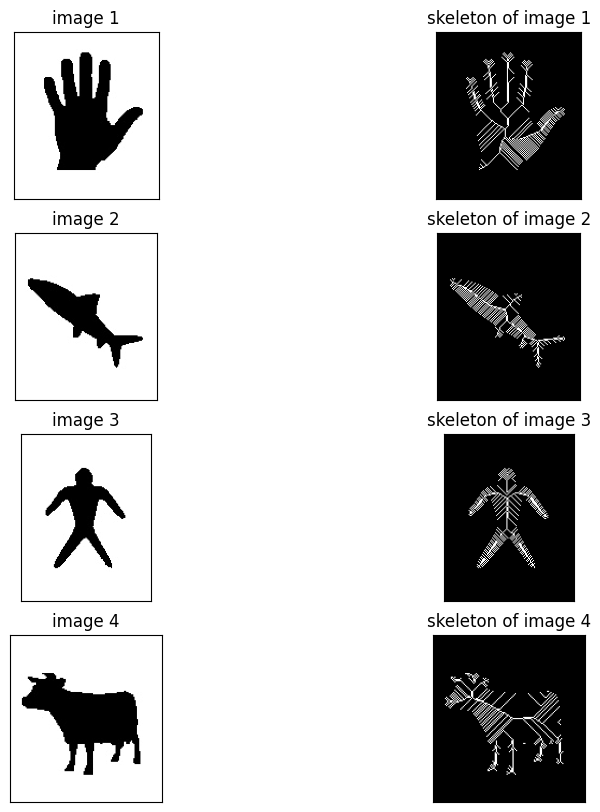

In [118]:
image_list = []

path1 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img1.jpg'
image1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
image_list.append([image1, 'image 1', 'img'])
image1_skeleton = get_skeleton(image1, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image1_skeleton, 'skeleton of image 1','img'])

path2 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img2.jpg'
image2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
image_list.append([image2, 'image 2', 'img'])
image2_skeleton= get_skeleton(image2, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image2_skeleton, 'skeleton of image 2','img'])

path3 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img3.jpg'
image3 = cv2.imread(path3, cv2.IMREAD_GRAYSCALE)
image_list.append([image3, 'image 3', 'img'])
image3_skeleton = get_skeleton(image3, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image3_skeleton, 'skeleton of image 3', 'img'])

path4 = '/content/drive/MyDrive/ColabNotebooks/FCV/HW4/images/img4.jpg'
image4 = cv2.imread(path4, cv2.IMREAD_GRAYSCALE)
image_list.append([image4, 'image 4', 'img'])
image4_skeleton = get_skeleton(image4, np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8))
image_list.append([image4_skeleton, 'skeleton of image 4', 'img'])

plotter(image_list, 4, 2, True, 10, 10, 'Q6-c')

End!!!